In [1]:
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
data = pd.read_csv('data/mars_2019.txt')

In [3]:
# MSL MISSION SOL; Ls; Mars Year; LOSOD (km^-1); LOSOD_Err (km^-1)
data

,MSL MISSION SOL,Ls,Mars Year,LOSOD,LOSOD_Err
0,100,208.1500,31,0.087053,0.007411
1,101,208.8200,31,0.081568,0.007022
2,105,211.3200,31,0.077329,0.006375
3,117,218.9400,31,0.063592,0.005229
4,119,220.2000,31,0.068652,0.005715
5,122,222.0900,31,0.073220,0.006210
6,124,223.3800,31,0.074782,0.006099
7,300,333.2900,31,0.061332,0.005246
8,306,336.6800,31,0.053804,0.004504
9,311,339.3900,31,0.067679,0.005716


In [4]:
data.describe()

,MSL MISSION SOL,Ls,Mars Year,LOSOD,LOSOD_Err
count,114.000000,114.000000,114.000000,114.000000,114.000000
mean,897.947368,198.973558,32.245614,0.067994,0.005939
std,453.456398,117.207815,0.710993,0.021188,0.002012
min,100.000000,1.101800,31.000000,0.026539,0.001786
25%,473.750000,85.584000,32.000000,0.053210,0.004504
50%,923.000000,221.145000,32.000000,0.070066,0.006097
75%,1253.750000,307.367500,33.000000,0.084585,0.007416
max,1701.000000,359.010000,34.000000,0.110750,0.009952


In [5]:

legend = [row[2] for (index, row) in data.iterrows()]

In [6]:
ls_sticks = 0, 45, 90, 135, 180, 225, 270, 315, 360, 405, 450, 495, 540
y_sticks = 0, 0.02, 0.04, 0.06, 0.08, 0.10, 0.12, 0.14

In [7]:
degree_sign= u'\N{DEGREE SIGN}'

In [8]:
x_label = [r"{:.0f}".format(_) + degree_sign for _ in ls_sticks]

In [9]:
x_int = [row[1] for (index, row) in data.iterrows()]
y_int = [row[3] for (index, row) in data.iterrows()]
err_int = [row[4] for (index, row) in data.iterrows()]

In [10]:
ex_x = [e + 360 for e in x_int]
ex_n_x = [e[0] for e in zip(ex_x, y_int) if e[0] <= 540]
ex_n_y = [e[1] for e in zip(ex_x, y_int) if e[0] <= 540]
ex_n_err = [e[2] for e in zip(ex_x, y_int, err_int) if e[0] <= 540]

In [11]:
x = x_int + ex_n_x
y = y_int + ex_n_y
err = err_int + ex_n_err

In [12]:
legend_31 = [row for (index, row) in data.iterrows() if row[2] == 31]
legend_32 = [row for (index, row) in data.iterrows() if row[2] == 32]
legend_33 = [row for (index, row) in data.iterrows() if row[2] == 33]
legend_34 = [row for (index, row) in data.iterrows() if row[2] == 34]

In [13]:
x_31 = [e[1] for e in legend_31]
y_31 = [e[3] for e in legend_31]
error_31 = [e[4] for e in legend_31]


x_32 = [e[1] for e in legend_32]
y_32 = [e[3] for e in legend_32]
error_32 = [e[4] for e in legend_32]

x_33 = [e[1] for e in legend_33]
y_33 = [e[3] for e in legend_33]
error_33 = [e[4] for e in legend_33]

x_34 = [e[1] for e in legend_34]
y_34 = [e[3] for e in legend_34]
error_34 = [e[4] for e in legend_34]

In [14]:
ex_x31 = [e + 360 for e in x_31]
ex_x32 = [e + 360 for e in x_32]
ex_x33 = [e + 360 for e in x_33]
ex_x34 = [e + 360 for e in x_34]

In [15]:
n_legend_31 = [e for e in zip(ex_x31, y_31, error_31) if e[0] <= 540]
n_legend_32 = [e for e in zip(ex_x32, y_32, error_32) if e[0] <= 540]
n_legend_33 = [e for e in zip(ex_x33, y_33, error_33) if e[0] <= 540]
n_legend_34 = [e for e in zip(ex_x34, y_34, error_34) if e[0] <= 540]

In [16]:
n_x31 = [e[0] for e in n_legend_31]
n_y31 = [e[1] for e in n_legend_31]
n_error31 = [e[2] for e in n_legend_31]

n_x32 = [e[0] for e in n_legend_32]
n_y32 = [e[1] for e in n_legend_32]
n_error32 = [e[2] for e in n_legend_32]

n_x33 = [e[0] for e in n_legend_33]
n_y33 = [e[1] for e in n_legend_33]
n_error33 = [e[2] for e in n_legend_33]

n_x34 = [e[0] for e in n_legend_34]
n_y34 = [e[1] for e in n_legend_34]
n_error34 = [e[2] for e in n_legend_34]

In [54]:
nn_x_31 = x_31 + n_x31
nn_y_31 = y_31 + n_y31
err_31 = error_31 + n_error31

nn_x_32 = x_32 + n_x32
nn_y_32 = y_32 + n_y32
err_32 = error_32 + n_error32

nn_x_33 = x_33 + n_x33
nn_y_33 = y_33 + n_y33
err_33 = error_32 + n_error33

nn_x_34 = x_34 + n_x34
nn_y_34 = y_34 + n_y34
err_34 = error_34 + n_error34

In [18]:
n_x_label = ['0°',
 '',
 '90°',
 '',
 '180°',
 '',
 '270°',
 '',
 '360°',
 '',
 '450°',
 '',
 '540°']

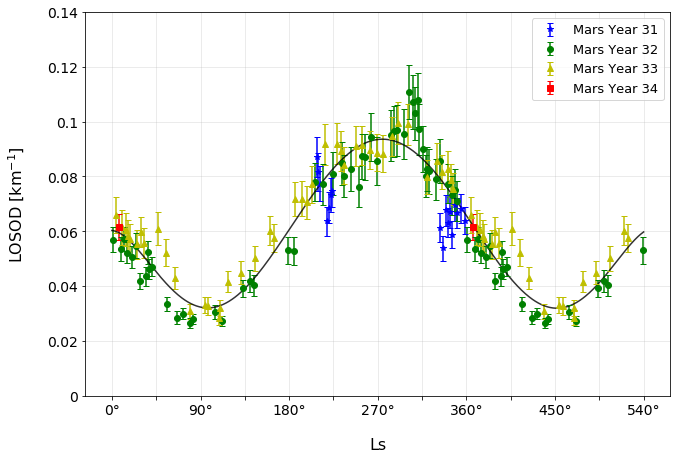

In [36]:
fig, ax = plt.subplots(1,1,figsize=(9,6))

ax.errorbar(x_31, y_31, yerr = error_31, fmt = 'b*', label='Mars Year 31', capsize=3)
ax.errorbar(x_32, y_32, yerr = error_32, fmt = 'go', label='Mars Year 32', capsize=3)
ax.errorbar(x_33, y_33, yerr = error_33, fmt = 'y^', label='Mars Year 33', capsize=3)
ax.errorbar(x_34, y_34, yerr = error_34, fmt = 'rs', label='Mars Year 34', capsize=3)
   
Coe = np.polyfit(x,y,6)    
PlyX = np.linspace(0,540,541)
PlyY = np.polyval(Coe,PlyX)    

plt.plot(PlotX,PlotY,c='k',alpha = 0.8)


# extended version
ax.errorbar(n_x31, n_y31, yerr = n_error31, fmt = 'b*', capsize=3)
ax.errorbar(n_x32, n_y32, yerr = n_error32, fmt = 'go', capsize=3)
ax.errorbar(n_x33, n_y33, yerr = n_error33, fmt = 'y^', capsize=3)
ax.errorbar(n_x34, n_y34, yerr = n_error34, fmt = 'rs', capsize=3)


ax.legend(loc = 0, fontsize = 13)


ax.yaxis.grid(True, alpha = 0.3)
ax.xaxis.grid(True, alpha = 0.3)

ax.set_xticks(ls_sticks)
ax.set_yticks(y_sticks)

ax.set_yticklabels(y_sticks, fontsize = 14)
ax.set_xticklabels(n_x_label, fontsize = 14)

plt.tight_layout()

plt.xlabel('Ls', labelpad = 20, fontsize = 16)
plt.ylabel('LOSOD [km$^{-1}$]', labelpad = 20, fontsize = 16)

plt.show()

In [96]:
# get the poly points:

# initialize list of lists 
dt = list(zip(PlotX, PlotY))
data_poly = dt
  
# Create the pandas DataFrame 
df_poly = pd.DataFrame(data_poly, columns = ['Ls', 'LOSOD']) 
  
# print dataframe. 

export_csv = df_poly.to_csv('~/Desktop/polynomial_file.csv', index = None, header=True)

# MY 32

In [21]:
nn_x_32 = x_32 + n_x32
nn_y_32 = y_32 + n_y32
err_32 = error_32 + n_error32

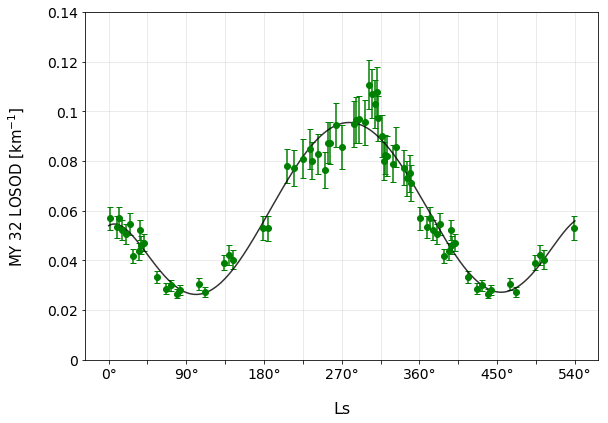

In [22]:
fig, ax = plt.subplots(1,1,figsize=(8,5.5))


ax.errorbar(nn_x_32, nn_y_32, yerr = err_32, fmt = 'go', label='Mars Year 32', capsize=3)

   
Coe_32 = np.polyfit(nn_x_32,nn_y_32,6)    
PlotX_32 = np.linspace(0,540,541)
PlotY_32 = np.polyval(Coe_32,PlotX_32)    

plt.plot(PlotX_32,PlotY_32,c='k',alpha = 0.8)




#ax.legend(loc = 0, fontsize = 13)


ax.yaxis.grid(True, alpha = 0.3)
ax.xaxis.grid(True, alpha = 0.3)

ax.set_xticks(ls_sticks)
ax.set_yticks(y_sticks)



ax.set_yticklabels(y_sticks, fontsize = 14)
ax.set_xticklabels(n_x_label, fontsize = 14)

plt.tight_layout()

plt.xlabel('Ls', labelpad = 20, fontsize = 16)
plt.ylabel('MY 32 LOSOD [km$^{-1}$]', labelpad = 20, fontsize = 15)

plt.show()

### get the polynomial points

In [23]:
# initialize list of lists 
data_32_n = list(zip(PlotX_32, PlotY_32))
  
# Create the pandas DataFrame 
df_32_n = pd.DataFrame(data_32_n, columns = ['Ls', 'LOSOD']) 
  
# print dataframe. 

#export_csv = df_32_n.to_csv('~/Desktop/polynomial_MY_32.csv', index = None, header=True)

### get the colest polynomial point corresponding to the data points

In [50]:
# get the corresponding index for all MY
approximated_x_31 = [int(e + 0.5) for e in nn_x_31]
MY31_index_poly_y = approximated_x_31

approximated_x_32 = [int(e + 0.5) for e in nn_x_32]
MY32_index_poly_y = approximated_x_32

approximated_x_33 = [int(e + 0.5) for e in nn_x_33]
MY33_index_poly_y = approximated_x_33

approximated_x_34 = [int(e + 0.5) for e in nn_x_34]
MY34_index_poly_y = approximated_x_34

# get the polynomial y to be divided
MY31_poly_y = [poly_y[i] for i in MY31_index_poly_y]
MY32_poly_y = [poly_y[i] for i in MY32_index_poly_y]
MY33_poly_y = [poly_y[i] for i in MY33_index_poly_y]
MY34_poly_y = [poly_y[i] for i in MY34_index_poly_y]

In [74]:
# ratio data y : polynomial y
ratio_31 = np.divide(nn_y_31, MY31_poly_y)
ratio_32 = np.divide(nn_y_32, MY32_poly_y)
ratio_33 = np.divide(nn_y_33, MY33_poly_y)
ratio_34 = np.divide(nn_y_34, MY34_poly_y)

### PLOT

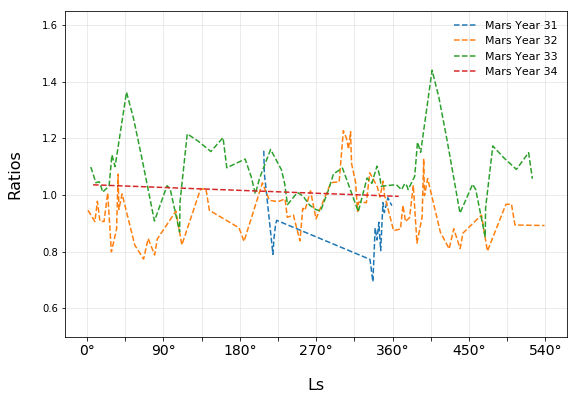

In [94]:
fig, ax = plt.subplots(1,1,figsize=(9,6))

#ax.errorbar(nn_x_31, nn_y_31, yerr = err_31, fmt = 'b*', label='Mars Year 31', capsize=3)
#ax.errorbar(nn_x_32, nn_y_32, yerr = err_32, fmt = 'go', label='Mars Year 32', capsize=3)
#ax.errorbar(nn_x_33, nn_y_33, yerr = err_33, fmt = 'y^', label='Mars Year 33', capsize=3)
#ax.errorbar(nn_x_34, nn_y_34, yerr = err_34, fmt = 'rs', label='Mars Year 34', capsize=3)

#ax.plot(PlotX,PlotY,c='k',alpha = 0.8)

ax.plot(nn_x_31, ratio_31, '--', label='Mars Year 31')
ax.plot(nn_x_32, ratio_32, '--', label='Mars Year 32')
ax.plot(nn_x_33, ratio_33, '--', label='Mars Year 33')
ax.plot(nn_x_34, ratio_34, '--', label='Mars Year 34')
ax.legend(loc = 0, fontsize = 11, frameon=False)


ax.yaxis.grid(True, alpha = 0.3)
ax.xaxis.grid(True, alpha = 0.3)

ax.set_xticks(ls_sticks)
ax.set_ylim(0.5, 1.65)

#ax.set_yticklabels(y_sticks, fontsize = 14)
ax.set_xticklabels(n_x_label, fontsize = 14)

#plt.tight_layout()

plt.xlabel('Ls', labelpad = 20, fontsize = 16)
plt.ylabel('Ratios', labelpad = 20, fontsize = 16)

plt.show()